---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [11]:
import pandas as pd
import numpy as np

def load_energy():
    energy = pd.read_excel('Energy Indicators.xls', skiprows=18, parse_cols="C:F",skipfooter=38)
    energy.columns =['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy.replace(r'\.+', np.nan, regex=True, inplace=True)
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
    energy['Country'] = energy['Country'].str.replace(r"\d+", "")
    energy['Country'] = energy['Country'].str.replace(r'United Kingdom of Great Britain and Northern .*', 'United Kingdom')
    energy['Country'] = energy['Country'].str.replace(r'United States of Amer.*', 'United States')
    energy['Country'] = energy['Country'].str.replace('Democratic People\'s Republic of Korea', 'South Korea')
   # energy['Country'] = energy['Country'].str.strip()
    return energy

def load_gdp():
    gdp = pd.read_csv('world_bank.csv', skiprows=4)
    gdp['Country Name'] = gdp['Country Name'].str.replace('Korea, Rep.', 'South Korea')
    gdp['Country Name'] = gdp['Country Name'].str.replace('Hong Kong SAR, China', 'Hong Kong')
    gdp['Country Name'] = gdp['Country Name'].str.replace('Iran, Islamic Rep.', 'Iran')
    gdp = gdp[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    gdp.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    return gdp

def load_journal():
    journal = pd.read_excel('scimagojr-3.xlsx')
    journal = journal[:15]
    return journal
    

#print(load_energy().head(1))
#print(load_gdp().head(1))
#print(load_journal().head(10))

def answer_one():
    energy = load_energy()
    GDP = load_gdp()
    ScimEn = load_journal()
    #print(energy[energy['Country'] == 'United States'])
    merge_e_g = pd.merge(energy, GDP, how='inner', left_on='Country', right_on='Country')
    #print(merge_e_g.head(10))
    merge_all = pd.merge(merge_e_g, ScimEn, how='inner', left_on='Country', right_on='Country')
    merge_ranked = merge_all[merge_all['Rank'] <= 15]
    #print(merge_ranked.head(20))
    final_result = merge_ranked[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    final_result.set_index('Country', inplace=True)
    final_result.sort_values('Rank', inplace=True)
    print(final_result.shape)
    return final_result

answer_one()

(15, 20)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     147887             147512     856806   
United States          2     113579             111426    1085684   
Japan                  3      34294              34054     275980   
United Kingdom         4      24328              23671     278694   
India                  5      21450              21183     179494   
Russian Federation     6      21259              20915      45629   
Germany                7      20898              20640     193676   
Canada                 8      20689              20353     285554   
France                 9      15584              15387     173959   
South Korea           10      14037              13952     151281   
Italy                 11      13662              13457     154242   
Spain                 12      11002              10886     167492   
Iran                  13      10969              10872      94111   
Australia             14      10616              10496     129788   
Brazil                15      10599              10521      84010   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       583858                    5.79      162   
United States               370574                    9.56      259   
Japan                        73491                    8.05      145   
United Kingdom               52119                   11.46      159   
India                        54929                    8.37      132   
Russian Federation           17368                    2.15       65   
Germany                      39615                    9.27      140   
Canada                       53955                   13.80      165   
France                       37411                   11.16      129   
South Korea                  29670                   10.78      116   
Italy                        37030                   11.29      121   
Spain                        31489                   15.22      130   
Iran                         31251                    8.58       85   
Australia                    22759                   12.23      123   
Brazil                       20271                    7.93       97   

                    Energy Supply  Energy Supply per Capita  % Renewable  \
Country                                                                    
China                1.271910e+11                      93.0    19.754910   
United States        9.083800e+10                     286.0    11.570980   
Japan                1.898400e+10                     149.0    10.232820   
United Kingdom       7.920000e+09                     124.0    10.600470   
India                3.319500e+10                      26.0    14.969080   
Russian Federation   3.070900e+10                     214.0    17.288680   
Germany              1.326100e+10                     165.0    17.901530   
Canada               1.043100e+10                     296.0    61.945430   
France               1.059700e+10                     166.0    17.020280   
South Korea          6.120000e+08                      25.0    70.180290   
Italy                6.530000e+09                     109.0    33.667230   
Spain                4.923000e+09                     106.0    37.968590   
Iran                 9.172000e+09                     119.0     5.707721   
Australia            5.386000e+09                     231.0    11.810810   
Brazil               1.214900e+10                      59.0    69.648030   

                            2006          2007          2008          2009  \
Country                                                                      
China               2.752132e+12  3.552183e+12  4.598205e+12  5.109954e+12   
United States       1.385589e+13  1.447764e+13  1.471858e+13  1.441874e+13   
Japan               4.530377e+12 

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [1]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [191]:
import pandas as pd
import numpy as np

def load_energy():
    energy = pd.read_excel('Energy Indicators.xls', skiprows=17, parse_cols="C:F")
    energy.columns =['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy.replace(r'\.+', np.nan, regex=True, inplace=True)
    energy['Energy Supply'] = energy['Energy Supply'] * 100000
    energy['Country'] = energy['Country'].str.replace(r"\(.*\)","")
    energy['Country'] = energy['Country'].str.replace(r"\d+", "")
    energy['Country'] = energy['Country'].str.replace(r'United Kingdom of Great Britain and Northern .*', 'United Kingdom')
    energy['Country'] = energy['Country'].str.replace(r'United States of Amer.*', 'United States')
    energy['Country'] = energy['Country'].str.replace('Democratic People\'s Republic of Korea', 'South Korea')
    energy['Country'] = energy['Country'].str.strip()
    return energy

def load_gdp():
    gdp = pd.read_csv('world_bank.csv', skiprows=4)
    gdp['Country Name'] = gdp['Country Name'].str.replace('Korea, Rep.', 'South Korea')
    gdp['Country Name'] = gdp['Country Name'].str.replace('Hong Kong SAR, China', 'Hong Kong')
    gdp['Country Name'] = gdp['Country Name'].str.replace('Iran, Islamic Rep.', 'Iran')
    return gdp

def load_journal():
    journal = pd.read_excel('scimagojr-3.xlsx')
    return journal
    

#print(load_energy().head(1))
#print(load_gdp().head(1))
#print(load_journal().head(10))

def answer_two():
    energy = load_energy()
    GDP = load_gdp()
    ScimEn = load_journal()
    #print(energy[energy['Country'] == 'United States'])
    merge_e_g = pd.merge(energy, GDP, how='inner', left_on='Country', right_on='Country Name')
    #print(merge_e_g.head(10))
    merge_all = pd.merge(merge_e_g, ScimEn, how='inner', left_on='Country', right_on='Country')
    #merge_ranked = merge_all[merge_all['Rank'] <= 15]
    #print(merge_ranked.head(20))
    #final_result = merge_all[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    #final_result.set_index('Country', inplace=True)
    #final_result.sort_values('Rank', inplace=True)
    return merge_all.shape[0]

print(answer_two())


161


<br>

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [12]:
def get_avg(row):
    data = row[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    return np.average(data)

def answer_three():
    Top15 = answer_one().copy()
    Top15.fillna(0, inplace=True)
    Top15['Avg GDP'] = Top15.apply(get_avg, axis=1)
    Top15.sort_values(by='Avg GDP', ascending=False, inplace=True)
    return Top15.loc[:,('Avg GDP')]

print(answer_three())

(15, 20)
Country
United States         1.562297e+13
China                 6.940046e+12
Japan                 5.176323e+12
Germany               3.532694e+12
United Kingdom        2.724782e+12
France                2.688773e+12
Italy                 2.130288e+12
Brazil                1.989028e+12
Russian Federation    1.656010e+12
Canada                1.611540e+12
India                 1.594349e+12
Spain                 1.406409e+12
Australia             1.202763e+12
South Korea           1.165810e+12
Iran                  4.369708e+11
Name: Avg GDP, dtype: float64


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [146]:
def answer_four():
    Top15 = answer_one()
    sixLargestGDP = Top15.loc[answer_three().index[5]]
    changed = abs(int(sixLargestGDP['2006']) - int(sixLargestGDP['2015']))
    return changed

print(answer_four())

(15, 20)
(15, 20)
108550097313


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [149]:
def answer_five():
    Top15 = answer_one()
    return Top15['Energy Supply per Capita'].mean()

print(answer_five())

(15, 20)
144.53333333333333


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [185]:
def answer_six():
    Top15 = answer_one()
    maxSeries = Top15.loc[Top15['% Renewable'].idxmax()]
    return pd.Series([maxSeries.name, maxSeries['% Renewable']])

print(answer_six())

(15, 20)
0    South Korea
1        70.1803
dtype: object


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [186]:
def answer_seven():
    Top15 = answer_one()
    sum = np.sum(Top15['Citations'])
    Top15['Ratio Citations'] = Top15['Citations'] / sum
    maxSeries = Top15.loc[Top15['Ratio Citations'].idxmax()]
    return pd.Series([maxSeries.name, maxSeries['Ratio Citations']])

print(answer_seven())

(15, 20)
0    United States
1         0.261208
dtype: object


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [188]:
def answer_eight():
    Top15 = answer_one()
    Top15['Population Estimate'] = Top15['Energy Supply']/ Top15['Energy Supply per Capita']
    maxSeries = Top15.loc[Top15['Population Estimate'].idxmax()]
    return maxSeries.name

print(answer_eight())

(15, 20)
China


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [206]:
def answer_nine():
    Top15 = answer_one()
    Top15['Population Estimate'] = Top15['Energy Supply']/ Top15['Energy Supply per Capita']
    Top15['Citable per person'] = Top15['Citable documents'] / Top15['Population Estimate']
    return Top15['Citable per person'].corr(Top15['Energy Supply per Capita'])

print(answer_nine())

(15, 20)
0.446913222168


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(15, 20)


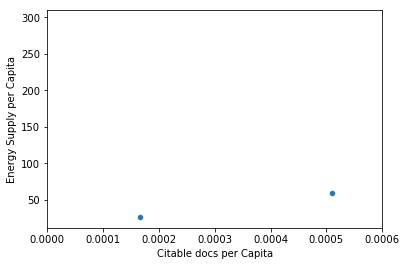

In [209]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    
plot9()

In [ ]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [223]:
def answer_ten():
    Top15 = answer_one()
    median = Top15['% Renewable'].median()
    Top15['HighRenew'] = np.where(Top15['% Renewable'] >= median, 1, 0)
    Top15.sort_values(by='Rank', inplace=True)
    return Top15['HighRenew']

print(answer_ten())

(15, 20)
Country
China                 1
United States         0
Japan                 0
United Kingdom        0
India                 0
Russian Federation    1
Germany               1
Canada                1
France                0
South Korea           1
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [256]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

def answer_eleven():
    Top15 = answer_one()
    Top15['Population Estimate'] = Top15['Energy Supply']/ Top15['Energy Supply per Capita']
    continent = pd.DataFrame(pd.Series(ContinentDict))
    mergedFrame = pd.merge(continent, Top15, left_index=True, right_index=True)
    mergedFrame.rename(index=str, columns={0:'Continent'}, inplace=True)
    groupedFrame = mergedFrame.groupby(by='Continent')
    
    result = (mergedFrame.set_index('Continent').groupby(level=0)['Population Estimate']
    .agg({'std': np.std, 'sum': np.sum, 'mean' :np.mean, 'size' : np.size})).fillna(0)
    
    return result

print(answer_eleven())

(15, 20)
                        std           sum          mean  size
Continent                                                    
Asia           6.841144e+07  2.873341e+08  5.746682e+07   5.0
Australia      0.000000e+00  2.331602e+06  2.331602e+06   1.0
Europe         3.464767e+06  4.579297e+07  7.632161e+06   6.0
North America  1.996696e+07  3.528552e+07  1.764276e+07   2.0
South America  0.000000e+00  2.059153e+07  2.059153e+07   1.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [271]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

def answer_twelve():
    Top15 = answer_one()
    group_names = ['One', 'Two', 'Three', 'Four', 'Five']
    Top15['Bins'] =  pd.cut(Top15['% Renewable'],5, labels=group_names)
    
    
    continent = pd.DataFrame(pd.Series(ContinentDict))
    mergedFrame = pd.merge(continent, Top15, left_index=True, right_index=True)
    mergedFrame.rename(index=str, columns={0:'Continent'}, inplace=True)
    mergedGrouped = mergedFrame.groupby(by=['Bins', 'Continent'])['Energy Supply'].agg({'count':np.size})
    return mergedGrouped['count']

print(answer_twelve())

(15, 20)
<class 'pandas.core.series.Series'>
Bins   Continent    
Five   Asia             1.0
       North America    1.0
       South America    1.0
One    Asia             3.0
       Australia        1.0
       Europe           4.0
       North America    1.0
Three  Europe           2.0
Two    Asia             1.0
Name: count, dtype: float64


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [294]:
def add_seperator(row):
    rowVal = row['Population Estimate']
    return '{0:,f}'.format(rowVal)

def answer_thirteen():
    Top15 = answer_one()
    Top15['Population Estimate'] = Top15['Energy Supply']/ Top15['Energy Supply per Capita']
    return Top15.apply(add_seperator, axis=1)

print(answer_thirteen())

(15, 20)
Country
China                 136,764,516.129032
United States          31,761,538.461538
Japan                  12,740,939.597315
United Kingdom          6,387,096.774194
India                 127,673,076.923077
Russian Federation     14,350,000.000000
Germany                 8,036,969.696970
Canada                  3,523,986.486486
France                  6,383,734.939759
South Korea             2,448,000.000000
Italy                   5,990,825.688073
Spain                   4,644,339.622642
Iran                    7,707,563.025210
Australia               2,331,601.731602
Brazil                 20,591,525.423729
dtype: object


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [295]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!